<a href="https://colab.research.google.com/github/Tejasjain21/Winter2023/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STOCK PREDICTION**

In [ ]:
!pip3 install --upgrade pandas
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

!pip install chart_studio
!pip install plotly --upgrade
import chart_studio.plotly as py

import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
tesla = pd.read_csv('/content/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days } days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [ ]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

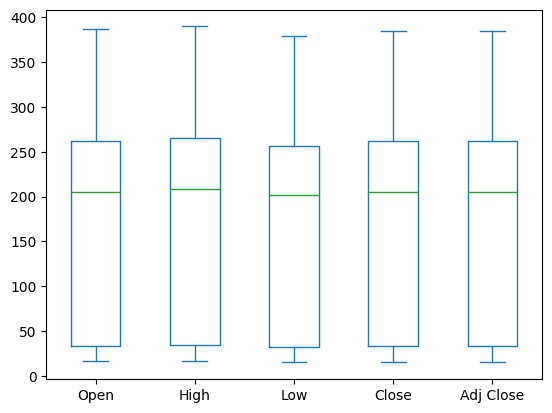

In [ ]:
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [ ]:
layout = go.Layout(
    title = 'Stock Prices of Tesla',
    xaxis= dict(
        title ='Date',
        titlefont=dict(
            family= 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis= dict(
        title = 'Price',
        titlefont=dict(
            family= 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)
tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
fig = go.Figure(data=tesla_data, layout=layout)
fig.show(renderer='colab')

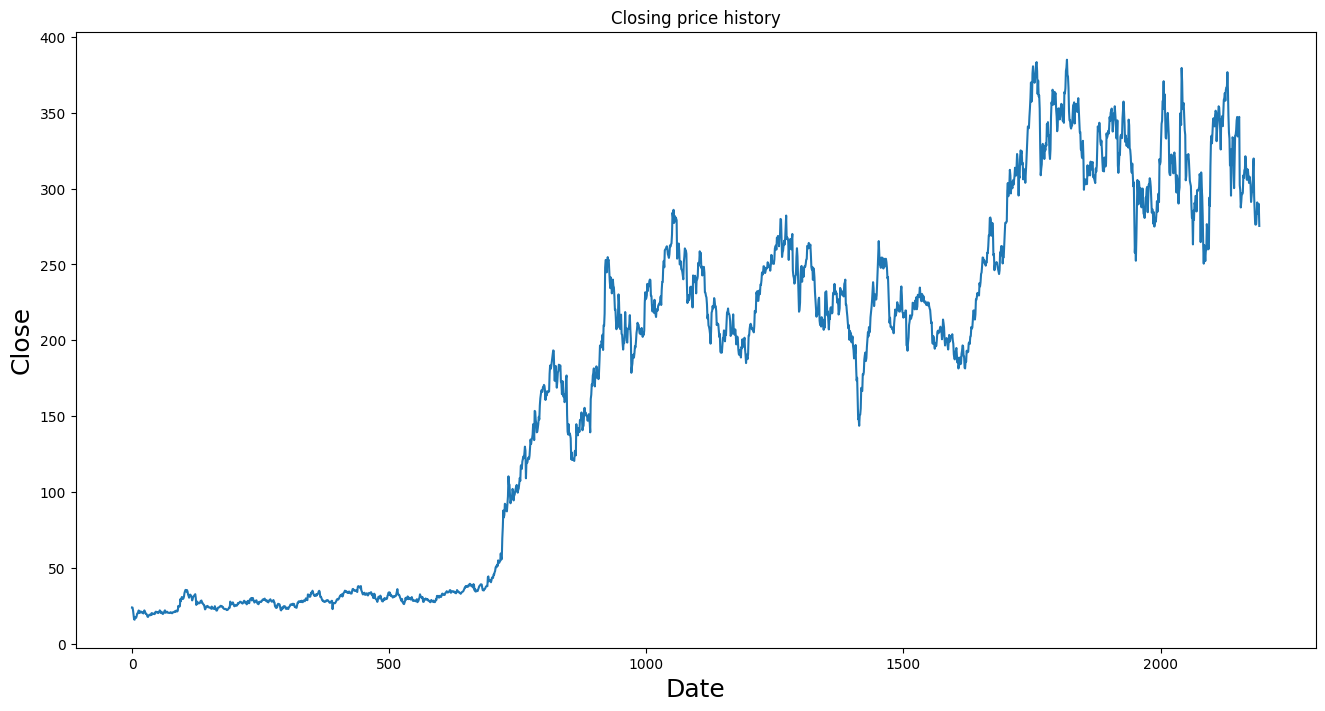

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing price history')

plt.plot(tesla['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()

In [ ]:
# Sample data with a column 'date' containing date strings
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03']}
df = pd.DataFrame(data)

# Convert the 'date' column to pandas DateTime format
#
df['date'] = pd.to_datetime(df['date'])

# Display the DataFrame
print(df)

        date
0 2023-01-01
1 2023-01-02
2 2023-01-03


##Build

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


##train test split


In [ ]:
X = np.array(tesla.index).reshape(-1,1)
Y = tesla ['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

##Feature scaling

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'actual'
)
trace1 = go.Scatter(
     x = X_train.T[0],
     y = lm.predict(X_train).T,
     mode = 'lines',
     name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout= layout)

In [ ]:
plot2.show(renderer='colab')

In [ ]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r_2'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r_2       0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



##Long short term memory

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
data = pd.read_csv('/content/Google_train_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
x_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : Length of the data
  x_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")



In [ ]:
hist = model.fit(x_train, y_train, epochs= 20, batch_size =32, verbose=2 )

Epoch 1/20
35/35 - 16s - loss: 0.0348 - 16s/epoch - 446ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0103 - 8s/epoch - 238ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0103 - 7s/epoch - 188ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0114 - 8s/epoch - 238ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0088 - 7s/epoch - 189ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0080 - 8s/epoch - 237ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0066 - 7s/epoch - 189ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0083 - 8s/epoch - 235ms/step
Epoch 9/20
35/35 - 13s - loss: 0.0062 - 13s/epoch - 359ms/step
Epoch 10/20
35/35 - 14s - loss: 0.0061 - 14s/epoch - 414ms/step
Epoch 11/20
35/35 - 11s - loss: 0.0104 - 11s/epoch - 319ms/step
Epoch 12/20
35/35 - 10s - loss: 0.0069 - 10s/epoch - 299ms/step
Epoch 13/20
35/35 - 13s - loss: 0.0062 - 13s/epoch - 382ms/step
Epoch 14/20
35/35 - 13s - loss: 0.0055 - 13s/epoch - 372ms/step
Epoch 15/20
35/35 - 13s - loss: 0.0055 - 13s/epoch - 373ms/step
Epoch 16/20
35/35 - 15s - loss: 0.0052 - 15s/epoch - 419ms/step

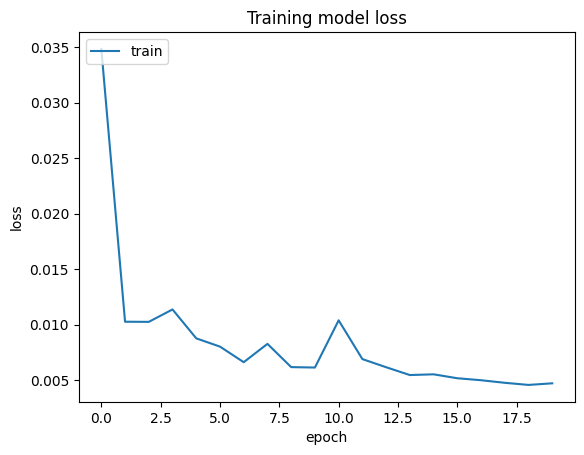

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60:,0:].values
#input
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range (timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 100ms/step


array([[1.1507382],
       [1.1541512],
       [1.1644548],
       [1.1799256],
       [1.1932797],
       [1.1952955],
       [1.1850637],
       [1.168686 ],
       [1.15617  ],
       [1.150925 ],
       [1.1443493],
       [1.1346556],
       [1.1255919],
       [1.1171505],
       [1.1145658],
       [1.1179935],
       [1.1332312],
       [1.1584488],
       [1.1883862],
       [1.2187016],
       [1.2334855],
       [1.232915 ],
       [1.2158965],
       [1.189089 ],
       [1.1629006],
       [1.1459261],
       [1.1399753],
       [1.1390473],
       [1.1342854],
       [1.1262349],
       [1.1164497],
       [1.1047183],
       [1.0871309],
       [1.064817 ],
       [1.0534605],
       [1.0591378],
       [1.0775051],
       [1.1006348],
       [1.1235726],
       [1.1368781],
       [1.1485577],
       [1.1614476],
       [1.1762152],
       [1.1903844],
       [1.2005081],
       [1.2026194],
       [1.194752 ],
       [1.186141 ],
       [1.1824223],
       [1.1861814],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

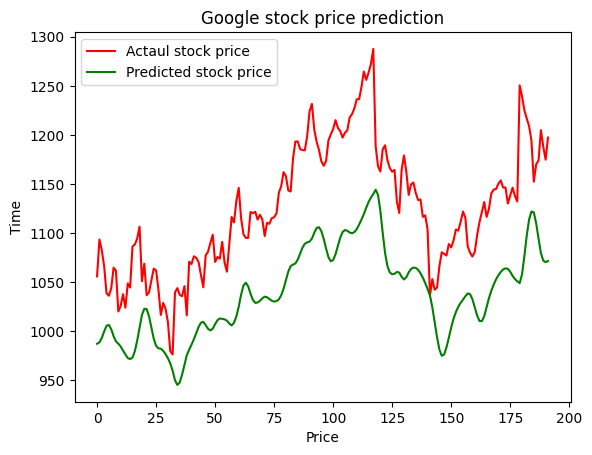

In [ ]:
plt.plot(y_test, color= 'red', label ='Actaul stock price')
plt.plot(predicted_price , color= 'green', label ='Predicted stock price')
plt.title('Google stock price prediction')
plt.ylabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()